In [200]:
import pandas as pd
import numpy as np

## Local PC
#
WORK_PATH = "./"
WORK_FILE = "/db_trace.csv"

print("Original CSV file = "+WORK_PATH + WORK_FILE)

df_org = pd.read_csv(WORK_PATH + WORK_FILE)
df_org.head()
df_org.info()


Original CSV file = .//db_trace.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7572 entries, 0 to 7571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seq         7572 non-null   int64 
 1   Call_Table  7446 non-null   object
 2   Call_Func   7572 non-null   object
 3   Call_File   7572 non-null   object
 4   Query       7572 non-null   object
dtypes: int64(1), object(4)
memory usage: 295.9+ KB


In [201]:
print('>>> [1] Before check NaN')
display(df_org[['Call_Table', 'Call_Func', 'Call_File', 'Query']].isnull().sum())
print('>>> [2] DropN/A')
display(df_org.dropna(subset=['Call_Table'], inplace=True))
print('>>> [3] After check NaN')
display(df_org[['Call_Table', 'Call_Func', 'Call_File', 'Query']].isnull().sum())

display(df_org.shape)

df_org.info()


>>> [1] Before check NaN


Call_Table    126
Call_Func       0
Call_File       0
Query           0
dtype: int64

>>> [2] DropN/A


None

>>> [3] After check NaN


Call_Table    0
Call_Func     0
Call_File     0
Query         0
dtype: int64

(7446, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 0 to 7571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seq         7446 non-null   int64 
 1   Call_Table  7446 non-null   object
 2   Call_Func   7446 non-null   object
 3   Call_File   7446 non-null   object
 4   Query       7446 non-null   object
dtypes: int64(1), object(4)
memory usage: 349.0+ KB


In [214]:
import re

def extract_after_chars(series, chars):
    # 여러 개의 특정 문자열 이후 값을 추출하는 함수
    def extract_value(text):
        for char in chars:
            pattern = re.compile(re.escape(char) + '(.*)')
            match = pattern.search(text)
            if match:
                return match.group(1).strip()
        # 특정 문자가 없을 경우 전체 문자열을 반환
        return text.strip()

    return series.apply(extract_value)

def extract_after_last_slash(series):
    # 마지막 슬래시 이후의 값을 추출하는 함수
    def extract_value(text):
        last_slash_pos = text.rfind('/')
        if last_slash_pos != -1:
            return text[last_slash_pos + 1:].strip()
        else:
            return text.strip()

    return series.apply(extract_value)

splitters = ["::", "->"]

df = df_org[['Call_Table', 'Call_Func', 'Call_File']]

df.rename(columns = {'Call_Table':'table', 'Call_Func':'org_callee', 'Call_File':'org_source_path'}, inplace = True)
df['function'] = extract_after_chars(df['org_callee'], splitters)
df['source'] = extract_after_last_slash(df['org_source_path'])

df = df[['table', 'function', 'source', 'org_callee', 'org_source_path']]
display(df.info())

df



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 0 to 7571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   table            7446 non-null   object
 1   function         7446 non-null   object
 2   source           7446 non-null   object
 3   org_callee       7446 non-null   object
 4   org_source_path  7446 non-null   object
dtypes: object(5)
memory usage: 349.0+ KB


C:\Users\Sysone\AppData\Local\Temp\ipykernel_8516\3961776981.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Call_Table':'table', 'Call_Func':'org_callee', 'Call_File':'org_source_path'}, inplace = True)
C:\Users\Sysone\AppData\Local\Temp\ipykernel_8516\3961776981.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['function'] = extract_after_chars(df['org_callee'], splitters)


None

,table,function,source,org_callee,org_source_path
0,wp_usermeta,update_meta_cache(),meta.php,update_meta_cache(),/var/www/html/wp-includes/meta.php
1,wp_posts,get_instance(),post.php,WP_Post::get_instance(),/var/www/html/wp-includes/post.php
2,wp_woocommerce_tax_rates,get_taxes(),Tax.php,AutomatticWAARTSDataStore::get_taxes(),/var/www/html/wp-content/plugins/woocommerce/s...
3,wp_wc_admin_notes,read(),class-wc-data-store.php,AutomatticWANDataStore->read(),/var/www/html/wp-content/plugins/woocommerce/i...
4,wp_wc_admin_note_actions,read_actions(),DataStore.php,AutomatticWANDataStore->read_actions(),/var/www/html/wp-content/plugins/woocommerce/s...
...,...,...,...,...,...
7567,wp_postmeta,update_meta_cache(),post.php,update_meta_cache(),/var/www/html/wp-includes/post.php
7568,wp_terms,_prime_term_caches(),class-wp-term-query.php,_prime_term_caches(),/var/www/html/wp-includes/class-wp-term-query.php
7569,wp_comments,_prime_comment_caches(),class-wp-comment-query.php,_prime_comment_caches(),/var/www/html/wp-includes/class-wp-comment-que...
7570,wp_posts,get_instance(),post.php,WP_Post::get_instance(),/var/www/html/wp-includes/post.php


In [27]:
# Dataframe Information
#
display(df.info())

# counting is NULL
#
# df[df['db'].isnull() | df['func'].isnull() | df['path'].isnull()]
print("[NULL count]"+"="*20)
print(df.isnull().sum())
print(df[df['table'].isna()])
print("="*30)

# df_null = df['table']

df_full_path = df['table'] + df['function'] + df['source']

print("[FULL PATH]" + "="*20)
display(df_full_path.head())

print("[FULL PATH DUPLICATED] = ", df_full_path.duplicated().sum())




<class 'pandas.core.frame.DataFrame'>
Int64Index: 7446 entries, 0 to 7571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   table            7446 non-null   object
 1   org_callee       7446 non-null   object
 2   org_source_path  7446 non-null   object
 3   function         7446 non-null   object
 4   source           7446 non-null   object
dtypes: object(5)
memory usage: 349.0+ KB


None

[NULL count]====================
table              0
org_callee         0
org_source_path    0
function           0
source             0
dtype: int64
Empty DataFrame
Columns: [table, org_callee, org_source_path, function, source]
Index: []
[FULL PATH]====================


0               wp_usermetaupdate_meta_cache()meta.php
1                       wp_postsget_instance()post.php
2           wp_woocommerce_tax_ratesget_taxes()Tax.php
3       wp_wc_admin_notesread()class-wc-data-store.php
4    wp_wc_admin_note_actionsread_actions()DataStor...
dtype: object

[FULL PATH DUPLICATED] =  7282


In [218]:

df.drop_duplicates(inplace=True)
df.info()

df.duplicated()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 7292
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   table            165 non-null    object
 1   function         165 non-null    object
 2   source           165 non-null    object
 3   org_callee       165 non-null    object
 4   org_source_path  165 non-null    object
dtypes: object(5)
memory usage: 7.7+ KB


0       False
1       False
2       False
3       False
4       False
        ...  
7220    False
7223    False
7225    False
7256    False
7292    False
Length: 165, dtype: bool

In [216]:
df_group = df.groupby(['table', 'function'])
df_group.head()

,table,function,source,org_callee,org_source_path
0,wp_usermeta,update_meta_cache(),meta.php,update_meta_cache(),/var/www/html/wp-includes/meta.php
1,wp_posts,get_instance(),post.php,WP_Post::get_instance(),/var/www/html/wp-includes/post.php
2,wp_woocommerce_tax_rates,get_taxes(),Tax.php,AutomatticWAARTSDataStore::get_taxes(),/var/www/html/wp-content/plugins/woocommerce/s...
3,wp_wc_admin_notes,read(),class-wc-data-store.php,AutomatticWANDataStore->read(),/var/www/html/wp-content/plugins/woocommerce/i...
4,wp_wc_admin_note_actions,read_actions(),DataStore.php,AutomatticWANDataStore->read_actions(),/var/www/html/wp-content/plugins/woocommerce/s...
...,...,...,...,...,...
7292,wp_commentmeta,update_meta_cache(),class-wp-metadata-lazyloader.php,update_meta_cache(),/var/www/html/wp-includes/class-wp-metadata-la...
7346,wp_commentmeta,update_meta_cache(),class-wp-metadata-lazyloader.php,update_meta_cache(),/var/www/html/wp-includes/class-wp-metadata-la...
7403,wp_posts,prime_product_variations(),AbstractProductGrid.php,AutomatticWBBAbstractProductGrid->prime_produc...,/var/www/html/wp-content/plugins/woocommerce/s...
7449,wp_woocommerce_order_items,create(),class-wc-data-store.php,Abstract_WC_Order_Item_Type_Data_Store->create(),/var/www/html/wp-content/plugins/woocommerce/i...


In [237]:
#df.head()

##Table 기준
#

display(df.shape)

db_call_list = {}

for i in range(0, df.shape[0]):
    row = df.iloc[i]
    new_idx = 0

    table = row.table

    # print(f'{row.table}, {row.function}, {row.source}')
    if table in db_call_list.keys():
        sub = db_call_list[table]
        new_idx = len(sub)
    else:
        db_call_list[table] = {}    

    sub_item = [{'func':row.function, 'source':row.source, 'callee':row.org_callee, 'path':row.org_source_path}]   
    db_call_list[table][new_idx] = sub_item

#print(len(db_call_list))
#pprint.pprint(db_call_list)

find_tables = ['wp_usermeta', 'wp_wc_orders_meta', 'wp_posts']

for find_table in find_tables:
    sub_info = db_call_list.get(find_table)

    print(f'<{find_table}>')
    for i in range(0, len(sub_info)):
        print(f'   {i} : {find_table} <= {sub_info[i][0]["func"]} <-- {sub_info[i][0]["source"]} ({sub_info[i][0]["path"]})')
    print(" ")



(165, 5)

<wp_usermeta>
   0 : wp_usermeta <= update_meta_cache() <-- meta.php (/var/www/html/wp-includes/meta.php)
   1 : wp_usermeta <= update_metadata() <-- user.php (/var/www/html/wp-includes/user.php)
   2 : wp_usermeta <= read_meta() <-- class-wc-data-store.php (/var/www/html/wp-content/plugins/woocommerce/includes/class-wc-data-store.php)
   3 : wp_usermeta <= update_meta_cache() <-- pluggable.php (/var/www/html/wp-includes/pluggable.php)
 
<wp_wc_orders_meta>
   0 : wp_wc_orders_meta <= dbdelta() <-- DatabaseUtil.php (/var/www/html/wp-content/plugins/woocommerce/src/Internal/Utilities/DatabaseUtil.php)
   1 : wp_wc_orders_meta <= get_order_data_for_ids() <-- OrdersTableDataStore.php (/var/www/html/wp-content/plugins/woocommerce/src/Internal/DataStores/Orders/OrdersTableDataStore.php)
   2 : wp_wc_orders_meta <= add_meta() <-- OrdersTableDataStore.php (/var/www/html/wp-content/plugins/woocommerce/src/Internal/DataStores/Orders/OrdersTableDataStore.php)
 
<wp_posts>
   0 : wp_posts <= get_

In [235]:
##Table 기준
#

display(df.shape)

db_call_list = {}

for i in range(0, df.shape[0]):
    row = df.iloc[i]
    new_idx = 0

    func = row.function

    # print(f'{row.table}, {row.function}, {row.source}')
    if func in db_call_list.keys():
        sub = db_call_list[func]
        new_idx = len(sub)
    else:
        db_call_list[func] = {}    

    sub_item = [{'table':row.table, 'source':row.source, 'callee':row.org_callee, 'path':row.org_source_path}]   
    db_call_list[func][new_idx] = sub_item

#print(len(db_call_list))
#pprint.pprint(db_call_list)

find_tables = ['wp_insert_post()', 'get_order_data_for_ids()', 'update_metadata()']

for find_table in find_tables:
    sub_info = db_call_list.get(find_table)

    print(f'<{find_table}>')
    for i in range(0, len(sub_info)):
        print(f'   {i} : {find_table} <= {sub_info[i][0]["table"]} <-- {sub_info[i][0]["source"]} ({sub_info[i][0]["path"]})')
    print(" ")


(165, 5)

<wp_insert_post()>
   0 : wp_insert_post() <= wp_posts <-- post.php (/var/www/html/wp-admin/includes/post.php)
   1 : wp_insert_post() <= wp_posts <-- post.php (/var/www/html/wp-includes/post.php)
   2 : wp_insert_post() <= wp_posts <-- OrdersTableDataStore.php (/var/www/html/wp-content/plugins/woocommerce/src/Internal/DataStores/Orders/OrdersTableDataStore.php)
 
<get_order_data_for_ids()>
   0 : get_order_data_for_ids() <= wp_wc_orders_meta <-- OrdersTableDataStore.php (/var/www/html/wp-content/plugins/woocommerce/src/Internal/DataStores/Orders/OrdersTableDataStore.php)
 
<update_metadata()>
   0 : update_metadata() <= wp_usermeta <-- user.php (/var/www/html/wp-includes/user.php)
   1 : update_metadata() <= wp_postmeta <-- post.php (/var/www/html/wp-includes/post.php)
   2 : update_metadata() <= wp_termmeta <-- taxonomy.php (/var/www/html/wp-includes/taxonomy.php)
 


In [ ]:
!pip install networkx
!pip install netgraph
!pip install igraph
!pip install graph-tools

In [110]:
df.head(10)

,table,function,source,org_callee,org_source_path
0,wp_usermeta,update_meta_cache(),meta.php,update_meta_cache(),/var/www/html/wp-includes/meta.php
1,wp_posts,get_instance(),post.php,WP_Post::get_instance(),/var/www/html/wp-includes/post.php
2,wp_woocommerce_tax_rates,get_taxes(),Tax.php,AutomatticWAARTSDataStore::get_taxes(),/var/www/html/wp-content/plugins/woocommerce/s...
3,wp_wc_admin_notes,read(),class-wc-data-store.php,AutomatticWANDataStore->read(),/var/www/html/wp-content/plugins/woocommerce/i...
4,wp_wc_admin_note_actions,read_actions(),DataStore.php,AutomatticWANDataStore->read_actions(),/var/www/html/wp-content/plugins/woocommerce/s...
9,wp_actionscheduler_actions,fetch_action(),functions.php,ActionScheduler_DBStore->fetch_action(),/var/www/html/wp-content/plugins/woocommerce/p...
11,wp_postmeta,update_meta_cache(),meta.php,update_meta_cache(),/var/www/html/wp-includes/meta.php
12,wp_zpm_categories,fetch(),ZephyrProjectManager.php,ZephyrProjectManagerCoreCategories::fetch(),/var/www/html/wp-content/plugins/zephyr-projec...
13,wp_zpm_projects,get_projects(),ZephyrProjectManager.php,ZephyrProjectManagerCoreProjects::get_projects(),/var/www/html/wp-content/plugins/zephyr-projec...
14,wp_woocommerce_shipping_zones,get_zones(),class-wc-data-store.php,WC_Shipping_Zone_Data_Store->get_zones(),/var/www/html/wp-content/plugins/woocommerce/i...


In [160]:
print (len(db_call_list))

for table, sub in db_call_list.items():
    print (table, sub)
    print(len(sub))
    break
    G.add_node('table', color='skyblue')

    

53
wp_usermeta {0: [{'func': 'update_meta_cache()', 'source': 'meta.php', 'callee': 'update_meta_cache()', 'path': '/var/www/html/wp-includes/meta.php'}], 1: [{'func': 'update_metadata()', 'source': 'user.php', 'callee': 'update_metadata()', 'path': '/var/www/html/wp-includes/user.php'}], 2: [{'func': 'read_meta()', 'source': 'class-wc-data-store.php', 'callee': 'WC_Data_Store_WP->read_meta()', 'path': '/var/www/html/wp-content/plugins/woocommerce/includes/class-wc-data-store.php'}], 3: [{'func': 'update_meta_cache()', 'source': 'pluggable.php', 'callee': 'update_meta_cache()', 'path': '/var/www/html/wp-includes/pluggable.php'}]}
4


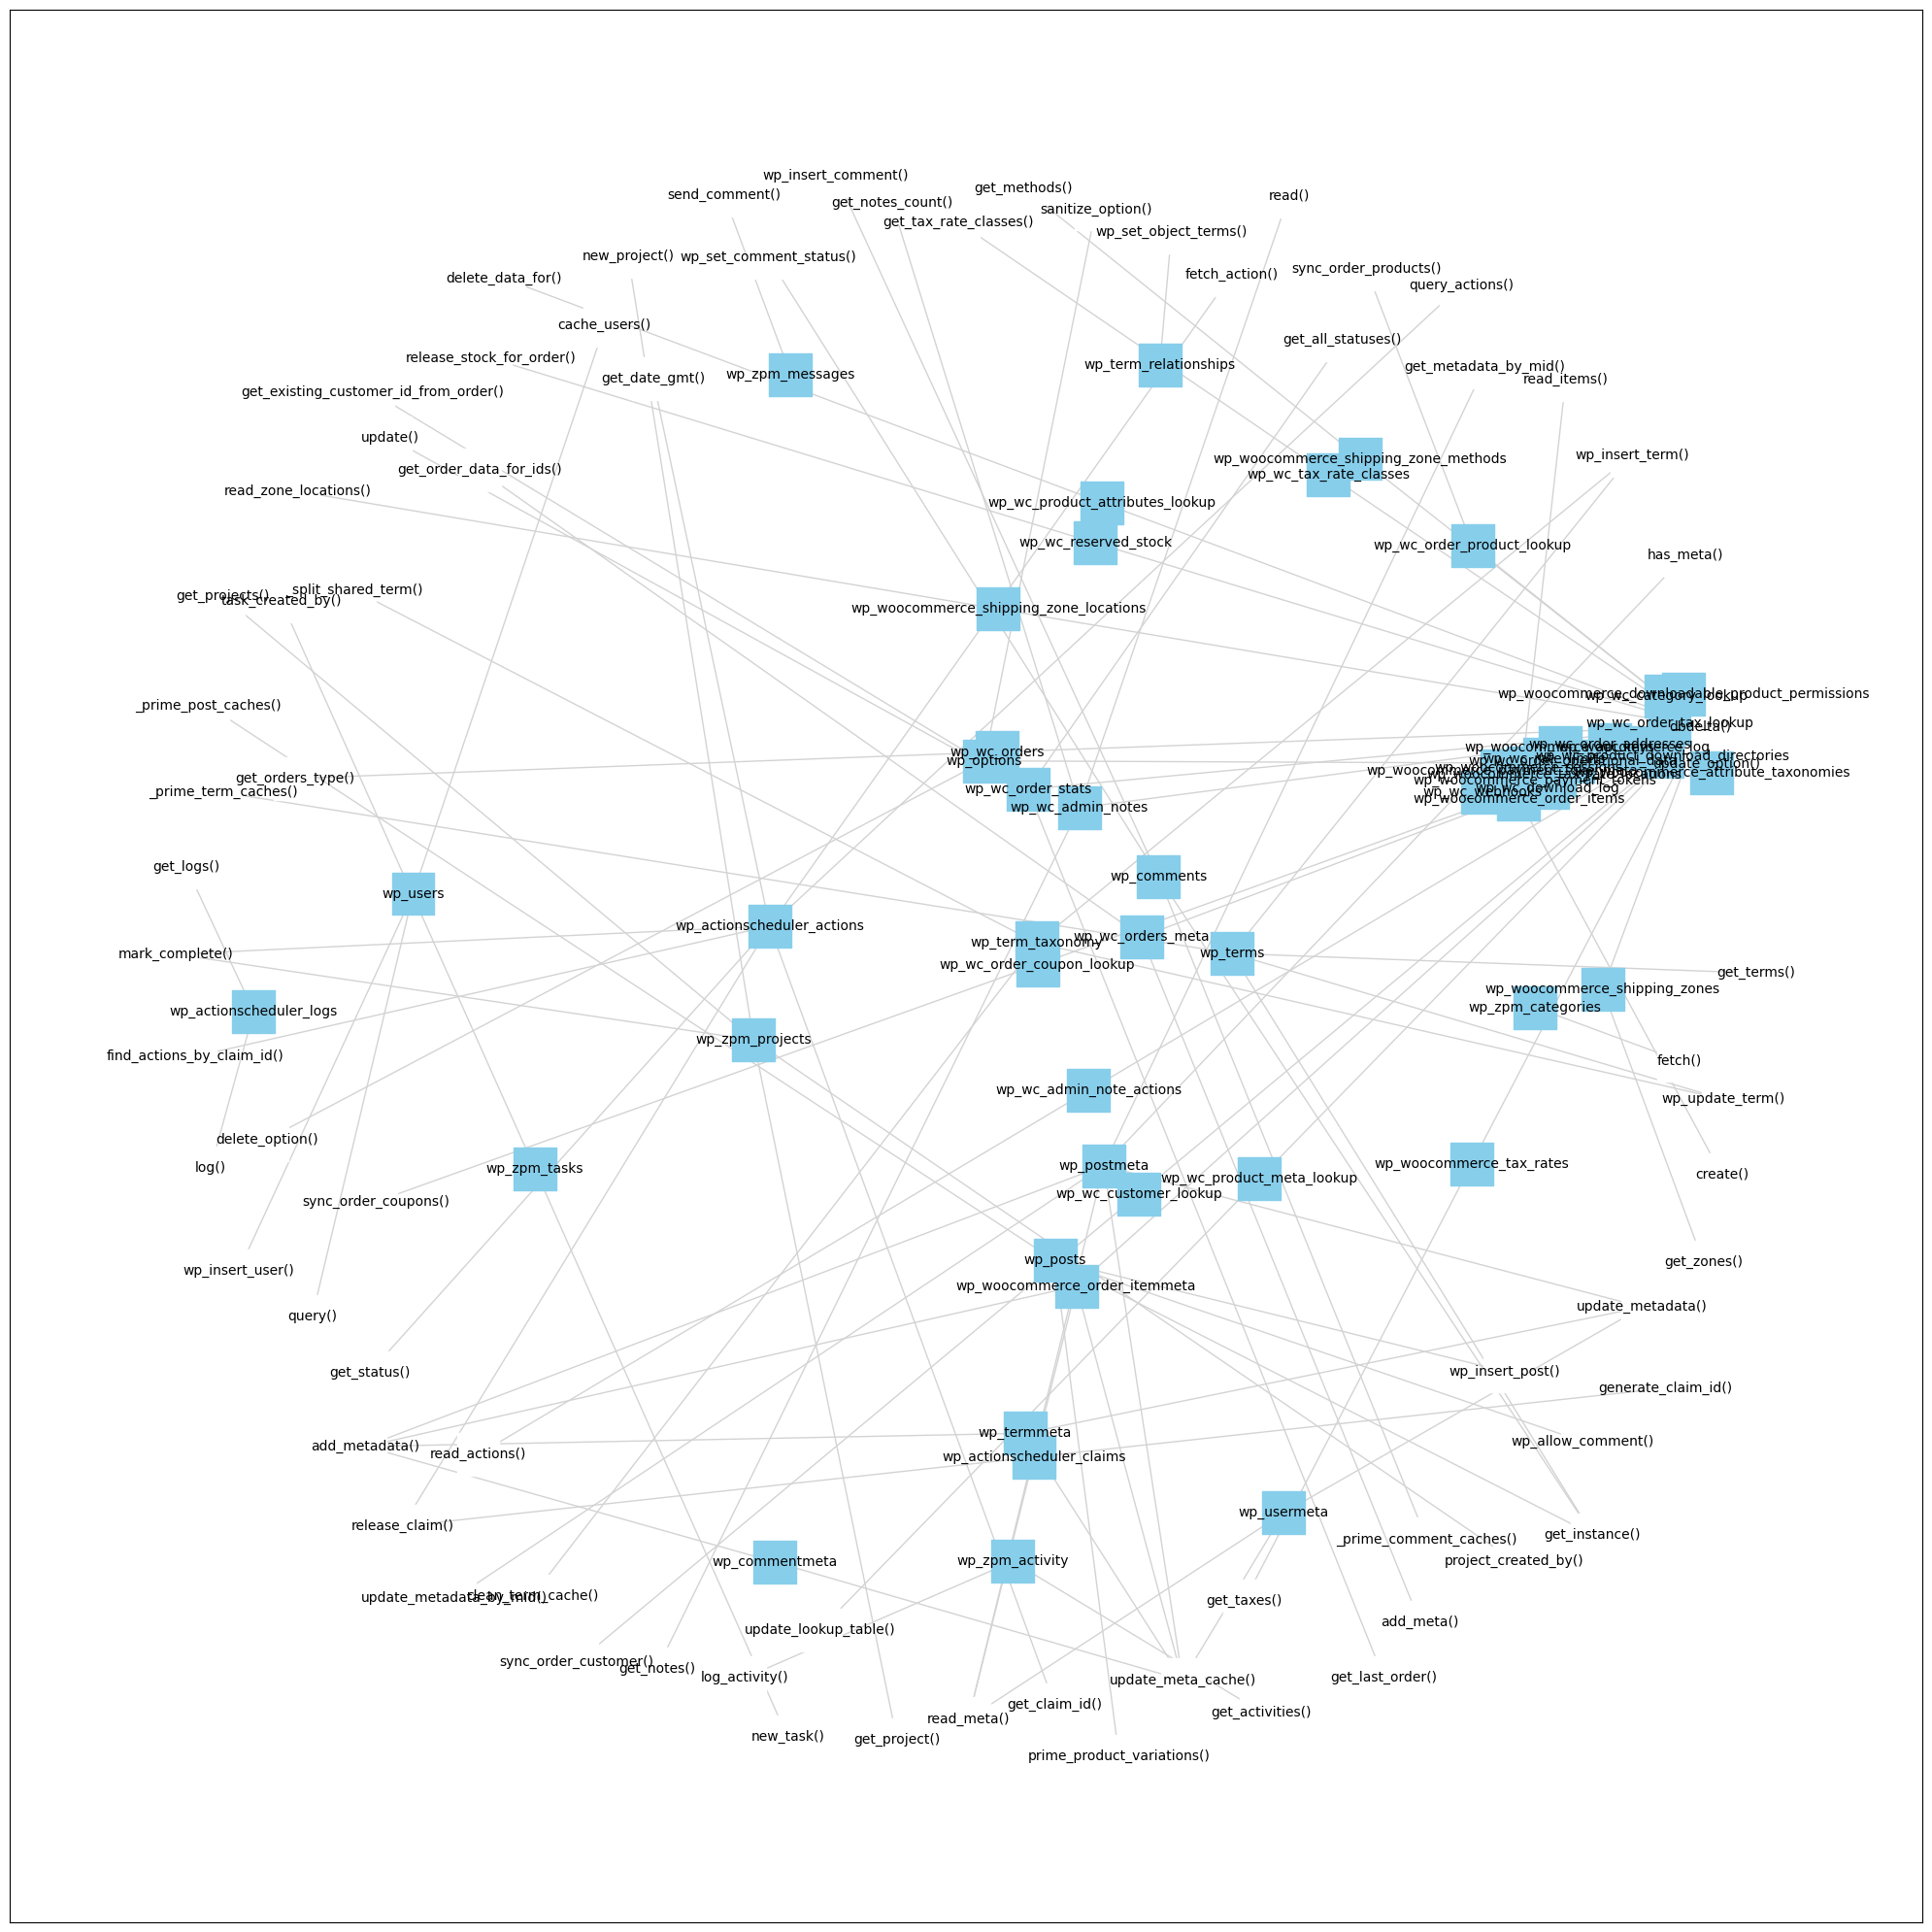

In [252]:
# prompt: df DataFrame 사용: networkx로 그리기(2)

import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph, InteractiveGraph, EditableGraph

# Create an empty graph
#G = nx.Graph()
G = nx.DiGraph()

plt.rcParams['figure.figsize'] = (20, 20)

for table, sub in db_call_list.items():
    G.add_node(table, color='skyblue', font_color='red')

    #display(sub)

    for i in range(0, len(sub)):
        sub_item = sub[i][0]
        #print(f'{i} = ', sub_item)
        function    = sub_item['func']
        source      = sub_item['source']
        G.add_node(function, color='white') #'darkorange')
        #G.add_node(source, color='lightgreen')

        G.add_edge(table, function)
        #G.add_edge(function, source)

# Graph
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G)

# Node colors
node_colors = [node[1]['color'] for node in G.nodes(data=True)]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_shape="s", node_size=1000) # Pass a list of shapes
nx.draw_networkx_edges(G, pos, edge_color='lightgray')
nx.draw_networkx_labels(G, pos, font_size=10)

plt.tight_layout()
plt.show()